# Finance Analysis & Strategy Notebook
Notebook ordinato per analisi comparativa e strategie di trading su titoli azionari.

In [1]:
# Import librerie e moduli
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from data_fetcher import download_multiple_stocks, prepare_stock_data
from analysis import (
    analyze_multiple_stocks,
    find_high_volume_days,
    find_high_volatility_days,
    calculate_volume_stats,
    calculate_correlation
)
from plotting import setup_plot_style, plot_multiple_stocks, plot_price_and_volume
from strategy import (
    analyze_trades_detailed,
    analyze_drawdown,
    moving_average_crossover_strategy,
    rsi_mean_reversion_strategy,
    analyze_rsi_trades
)

## Configurazione parametri

In [2]:
# Parametri principali
setup_plot_style()
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'JPM', 'V', 'WMT']
end_date = datetime.now()
start_date = end_date - timedelta(days=365*2)
print(f"📅 Periodo analisi: {start_date.date()} → {end_date.date()}")

📅 Periodo analisi: 2023-11-25 → 2025-11-24


## Download dati multipli

In [3]:
stocks_data = download_multiple_stocks(tickers, start_date, end_date)
print(f"✅ Dati scaricati per {len(stocks_data)} titoli")

⬇️  Downloading AAPL... 

c:\Repos\finance\finance\data_fetcher.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 days downloaded
⬇️  Downloading MSFT... 

c:\Repos\finance\finance\data_fetcher.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 days downloaded
⬇️  Downloading GOOGL... 

c:\Repos\finance\finance\data_fetcher.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 days downloaded
⬇️  Downloading AMZN... 

c:\Repos\finance\finance\data_fetcher.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 days downloaded
⬇️  Downloading TSLA... 

c:\Repos\finance\finance\data_fetcher.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 days downloaded
⬇️  Downloading NVDA... 

c:\Repos\finance\finance\data_fetcher.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 days downloaded
⬇️  Downloading META... 

c:\Repos\finance\finance\data_fetcher.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 days downloaded
⬇️  Downloading JPM... 

c:\Repos\finance\finance\data_fetcher.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 days downloaded
⬇️  Downloading V... 

c:\Repos\finance\finance\data_fetcher.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 days downloaded
⬇️  Downloading WMT... 

c:\Repos\finance\finance\data_fetcher.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 days downloaded
✅ Dati scaricati per 10 titoli


## Analisi comparativa tra titoli

,price_start,price_end,total_return,volatility,daily_returns_mean,daily_returns_std,ticker
0,188.014404,275.920013,46.754720,28.073018,0.092198,1.768434,AAPL
1,373.047913,474.000000,27.061427,22.092774,0.057531,1.391714,MSFT
2,135.475616,318.579987,135.156698,30.399060,0.189373,1.914961,GOOGL
3,147.729996,226.279999,53.171330,31.443267,0.104823,1.980740,AMZN
4,236.080002,417.779999,76.965434,63.516610,0.192984,4.001170,TSLA
5,48.213585,182.550003,278.627732,51.086863,0.318144,3.218170,NVDA
6,332.649353,613.049988,84.293155,37.275915,0.149353,2.348162,META
7,146.515640,298.000000,103.391255,23.684534,0.153183,1.491985,JPM
8,250.433456,329.299988,31.492011,19.429927,0.062279,1.223970,V
9,51.062752,104.059998,103.788464,21.544158,0.151595,1.357154,WMT


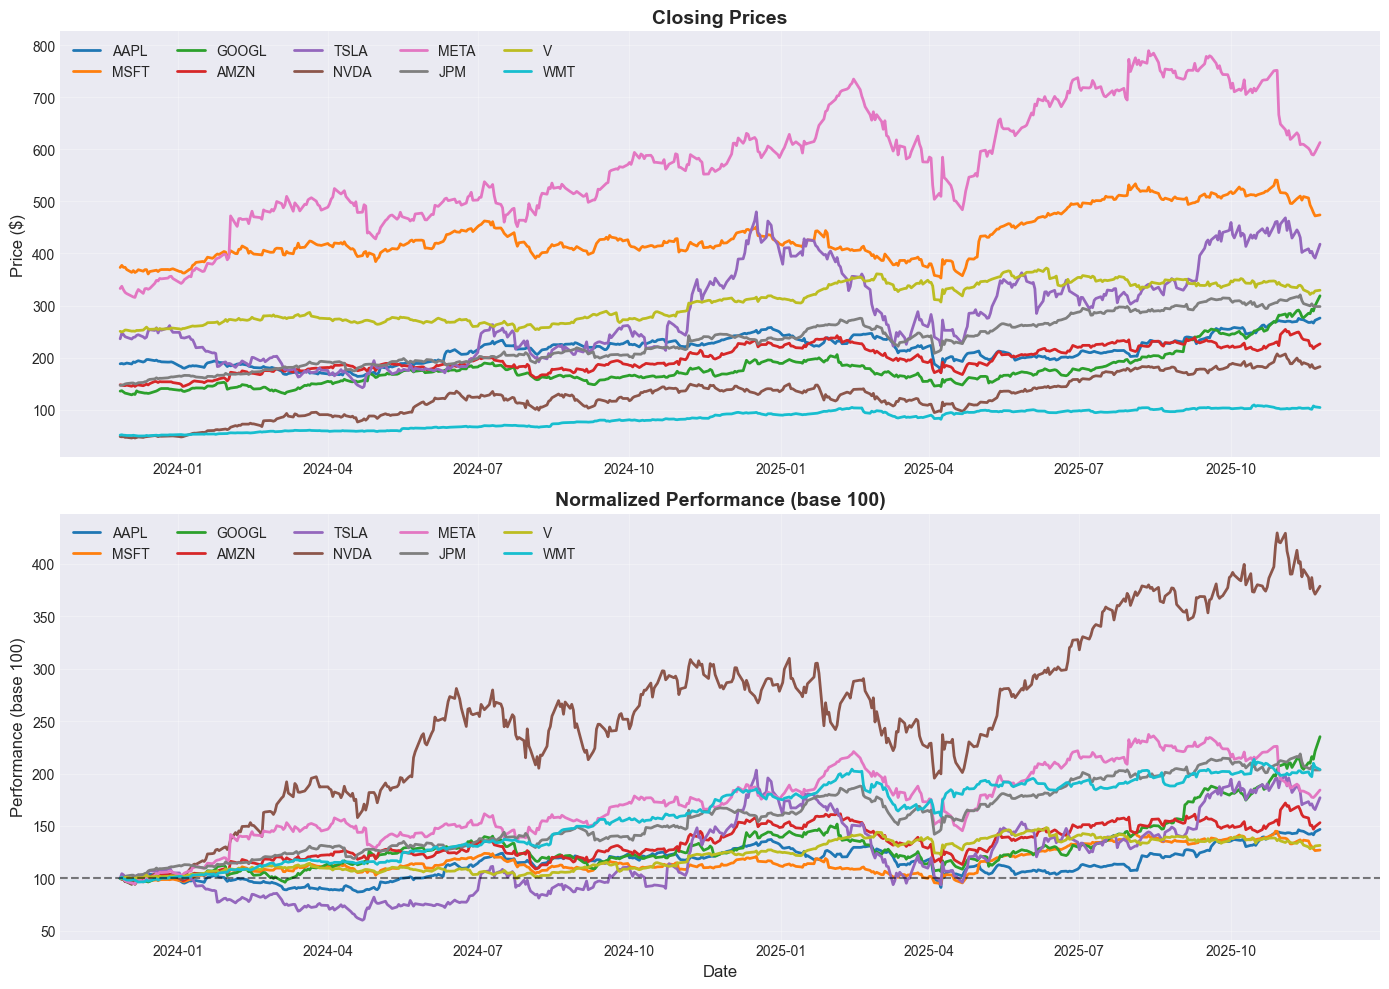

In [4]:
metrics_df = analyze_multiple_stocks(stocks_data)
display(metrics_df)
plot_multiple_stocks(stocks_data, normalized=False)

## Analisi dettagliata di un titolo

📥 Downloading BTC...


c:\Repos\finance\finance\data_fetcher.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period=period, progress=False)


✅ BTC: 231 days of data prepared
📅 Period: 2024-12-23 → 2025-11-24
🔥 HIGH VOLUME DAYS (>2x average) for BTC: 10 days


Price,Close,Volume,Volume_Ratio,Daily_Return
Date,,,,
2025-11-21,37.439999,7349600,2.856088,-0.020152
2025-04-07,34.529999,2505900,2.692417,-0.072024
2025-07-10,50.270000,2542700,2.621259,0.014121
2025-02-26,37.320000,2965300,2.569406,-0.044057
2025-10-10,51.619999,4028600,2.527741,-0.037300


⚡ TOP 10 MOST VOLATILE DAYS:


Price,Close,Daily_Range_Pct,Daily_Return,Volume_Ratio
Date,,,,
2025-03-03,38.099998,9.567618,0.020627,1.292737
2025-03-04,38.500000,8.970105,0.010499,1.635375
2025-04-09,36.500000,8.240139,0.073845,1.978469
2025-02-03,44.860001,8.167504,-0.003333,1.652827
2025-02-26,37.320000,7.559098,-0.044057,2.569406
2025-04-07,34.529999,7.247242,-0.072024,2.692417
2025-03-10,34.990002,7.147027,-0.092112,1.595097
2025-11-20,38.209999,6.545736,-0.034369,1.238848
2025-03-11,36.820000,5.857141,0.052301,0.653361


📊 VOLUME STATISTICS:
mean: 1,399,813
median: 1,123,300
max: 7,349,600
min: 447,900
std: 833,041
🔗 Correlation Volume Ratio vs |Daily Return|: 0.386


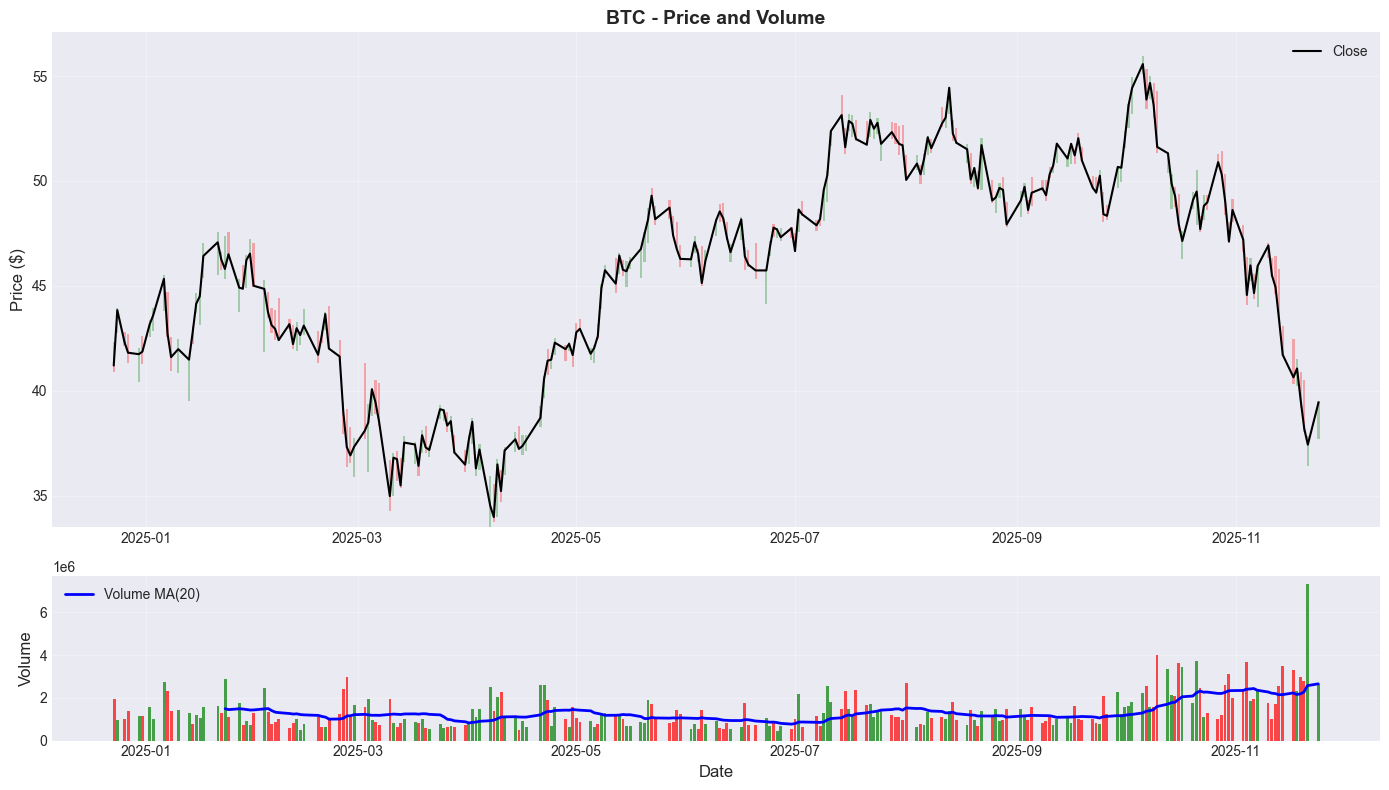

In [5]:
ticker_detail = 'BTC'
pltr_data = prepare_stock_data(ticker_detail, period='1y')
if pltr_data is not None:
    high_volume_days = find_high_volume_days(pltr_data, threshold=2.0)
    print(f"🔥 HIGH VOLUME DAYS (>2x average) for {ticker_detail}: {len(high_volume_days)} days")
    display(high_volume_days.nlargest(5, 'Volume_Ratio')[['Close', 'Volume', 'Volume_Ratio', 'Daily_Return']])

    high_vol_days = find_high_volatility_days(pltr_data, n=10)
    print(f"⚡ TOP 10 MOST VOLATILE DAYS:")
    display(high_vol_days[['Close', 'Daily_Range_Pct', 'Daily_Return', 'Volume_Ratio']])

    vol_stats = calculate_volume_stats(pltr_data)
    print("📊 VOLUME STATISTICS:")
    for k, v in vol_stats.items():
        print(f"{k}: {v:,.0f}")

    correlation = calculate_correlation(pltr_data, 'Volume_Ratio', 'Daily_Return')
    print(f"🔗 Correlation Volume Ratio vs |Daily Return|: {correlation:.3f}")

    plot_price_and_volume(pltr_data, ticker_detail)

## Strategia Moving Average Crossover su AAPL

In [6]:
start = '2010-01-01'
end = '2025-11-20'

results_ma = moving_average_crossover_strategy(ticker_detail, start, end, fast_period=20, slow_period=50, initial_capital=10000)
trades = results_ma[results_ma['Position'] != 0][['Close', 'MA_Fast', 'MA_Slow', 'Position']].head(10)
trades['Action'] = trades['Position'].map({1: '🟢 BUY', -1: '🔴 SELL'})
display(trades[['Close', 'Action']])

📥 Scaricando dati BTC...


TypeError: download() got an unexpected keyword argument 'cache'

In [ ]:
start_date

datetime.datetime(2023, 11, 25, 22, 29, 50, 572086)

In [ ]:
import yfinance as yf
start = '2010-01-01'
end = '2025-11-20'
yf.download("AAPL", start=start_date, end=end_date, progress=False, ignore_tz=True)

C:\Users\matti\AppData\Local\Temp\ipykernel_39356\25391247.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download("AAPL", start=start_date, end=end_date, progress=False)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-11-27,188.014389,188.886161,187.132716,188.143178,40552600
2023-11-28,188.618668,189.292314,187.628023,188.004473,38415400
2023-11-29,187.598312,190.292866,187.202061,189.113997,43014200
2023-11-30,188.172897,188.539446,186.429369,188.063926,48794400
2023-12-01,189.450836,189.767835,187.459631,188.549346,45704800
...,...,...,...,...,...
2025-11-18,267.440002,270.709991,265.320007,269.989990,45677300
2025-11-19,268.559998,272.209991,265.500000,265.529999,40424500


## Analisi trade-by-trade e statistiche

In [ ]:
trades_df = analyze_trades_detailed(results_ma, initial_capital=10000)
display(trades_df)
print(f"Numero totale trade: {len(trades_df)}")
print(f"Trade vincenti: {len(trades_df[trades_df['Result'] == 'WIN'])}")
print(f"Trade perdenti: {len(trades_df[trades_df['Result'] == 'LOSS'])}")
print(f"Win Rate: {(len(trades_df[trades_df['Result'] == 'WIN']) / len(trades_df) * 100):.2f}%")

winning_trades = trades_df[trades_df['Result'] == 'WIN']
losing_trades = trades_df[trades_df['Result'] == 'LOSS']
if len(winning_trades) > 0:
    print(f"Average Win: {winning_trades['PnL_%'].mean():.2f}%")
    print(f"Average Win ($): ${winning_trades['PnL_$'].mean():.2f}")
    print(f"Largest Win: {winning_trades['PnL_%'].max():.2f}%")
if len(losing_trades) > 0:
    print(f"Average Loss: {losing_trades['PnL_%'].mean():.2f}%")
    print(f"Average Loss ($): ${losing_trades['PnL_$'].mean():.2f}")
    print(f"Largest Loss: {losing_trades['PnL_%'].min():.2f}%")
if len(losing_trades) > 0 and len(winning_trades) > 0:
    risk_reward = abs(winning_trades['PnL_%'].mean() / losing_trades['PnL_%'].mean())
    print(f"Risk/Reward Ratio: {risk_reward:.2f}")
print(f"Holding period medio: {trades_df['Holding_Days'].mean():.1f} giorni")

,Trade_Num,Entry_Date,Entry_Price,Exit_Date,Exit_Price,PnL_%,PnL_$,Holding_Days,Result
0,1,2024-10-09,27.000000,2025-02-21,42.020000,55.629631,5562.963133,135,WIN
1,2,2025-04-30,41.709999,2025-09-05,49.439999,18.532725,1853.272527,128,WIN
2,3,2025-10-06,55.570000,2025-10-31,48.619999,-12.506750,-1250.674969,25,LOSS


Numero totale trade: 3
Trade vincenti: 2
Trade perdenti: 1
Win Rate: 66.67%
Average Win: 37.08%
Average Win ($): $3708.12
Largest Win: 55.63%
Average Loss: -12.51%
Average Loss ($): $-1250.67
Largest Loss: -12.51%
Risk/Reward Ratio: 2.96
Holding period medio: 96.0 giorni


## Grafici distribuzione trade

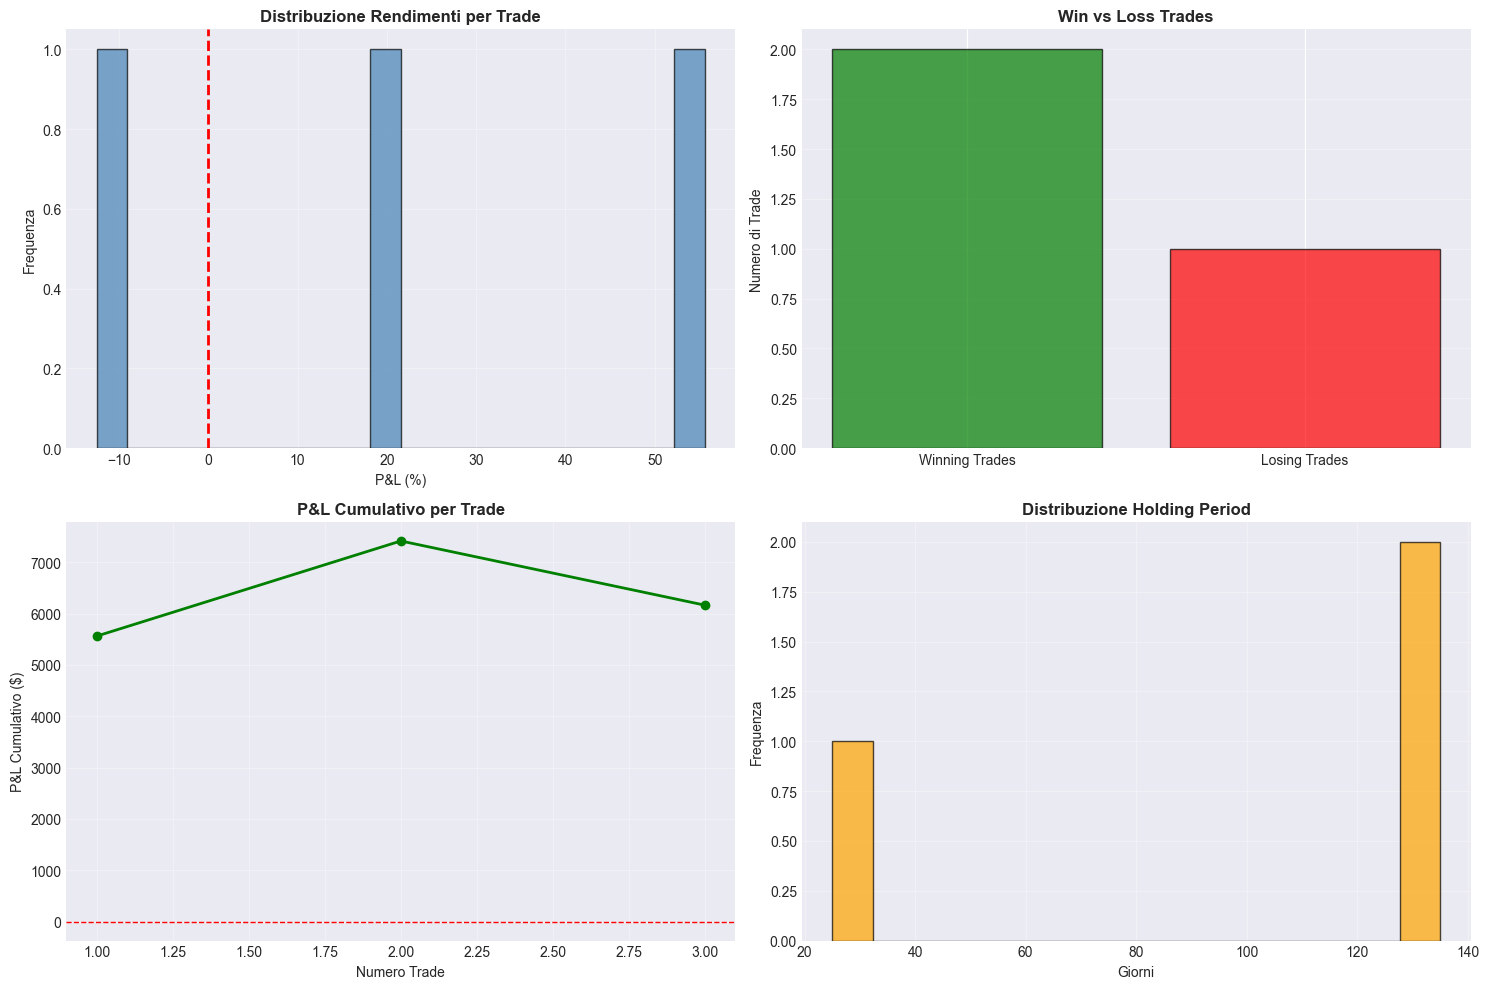

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0, 0].hist(trades_df['PnL_%'], bins=20, color='steelblue', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 0].set_title('Distribuzione Rendimenti per Trade', fontweight='bold')
axes[0, 0].set_xlabel('P&L (%)')
axes[0, 0].set_ylabel('Frequenza')
axes[0, 0].grid(True, alpha=0.3)

win_count = len(winning_trades)
loss_count = len(losing_trades)
axes[0, 1].bar(['Winning Trades', 'Losing Trades'], [win_count, loss_count], color=['green', 'red'], alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Win vs Loss Trades', fontweight='bold')
axes[0, 1].set_ylabel('Numero di Trade')
axes[0, 1].grid(True, alpha=0.3, axis='y')

trades_df['Cumulative_PnL_$'] = trades_df['PnL_$'].cumsum()
axes[1, 0].plot(trades_df['Trade_Num'], trades_df['Cumulative_PnL_$'], marker='o', linewidth=2, markersize=6, color='green')
axes[1, 0].axhline(y=0, color='red', linestyle='--', linewidth=1)
axes[1, 0].set_title('P&L Cumulativo per Trade', fontweight='bold')
axes[1, 0].set_xlabel('Numero Trade')
axes[1, 0].set_ylabel('P&L Cumulativo ($)')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(trades_df['Holding_Days'], bins=15, color='orange', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Distribuzione Holding Period', fontweight='bold')
axes[1, 1].set_xlabel('Giorni')
axes[1, 1].set_ylabel('Frequenza')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Analisi Drawdown


📉 ANALISI DRAWDOWN:
Max Drawdown: -22.99%
Peak prima del DD: 2025-08-13
Bottom del DD: 2025-10-30
Recovery: Non ancora recuperato!


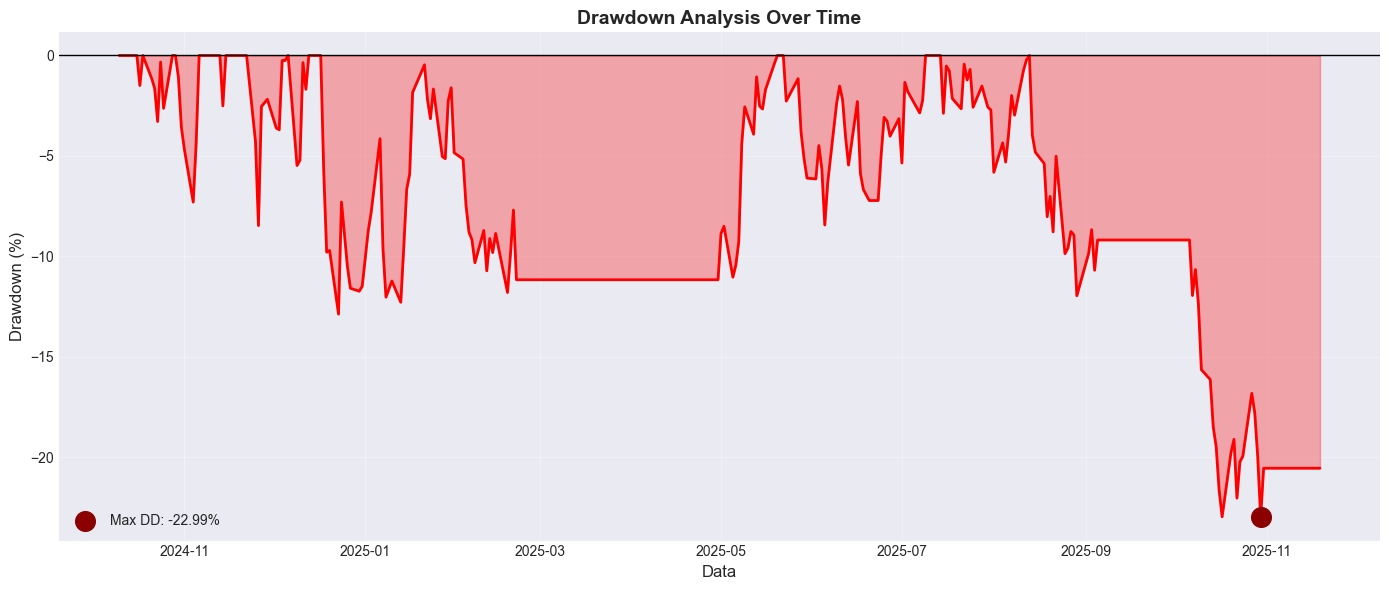

In [ ]:
analyze_drawdown(results_ma)

## Strategia RSI

In [ ]:
results_rsi = rsi_mean_reversion_strategy(ticker_detail, start, end,
                                          rsi_period=14,
                                          oversold=30,
                                          overbought=70,
                                          initial_capital=10000)

# Mostra primi segnali
print("\n🎯 PRIMI SEGNALI RSI:")
trades = results_rsi[results_rsi['Position'] != 0][['Close', 'RSI', 'Position']].head(10)
trades['Action'] = trades['Position'].map({1: '🟢 BUY', -1: '🔴 SELL'})
print(trades[['Close', 'RSI', 'Action']])

📥 Scaricando dati BTC...
✅ Strategia calcolata su 328 giorni
📅 Periodo: 2024-08-01 → 2025-11-19

🎯 PRIMI SEGNALI RSI:
Price       Close  RSI Action
Date                         
2024-08-01   28.1  0.0  🟢 BUY


c:\Repos\finance\finance\strategy.py:244: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


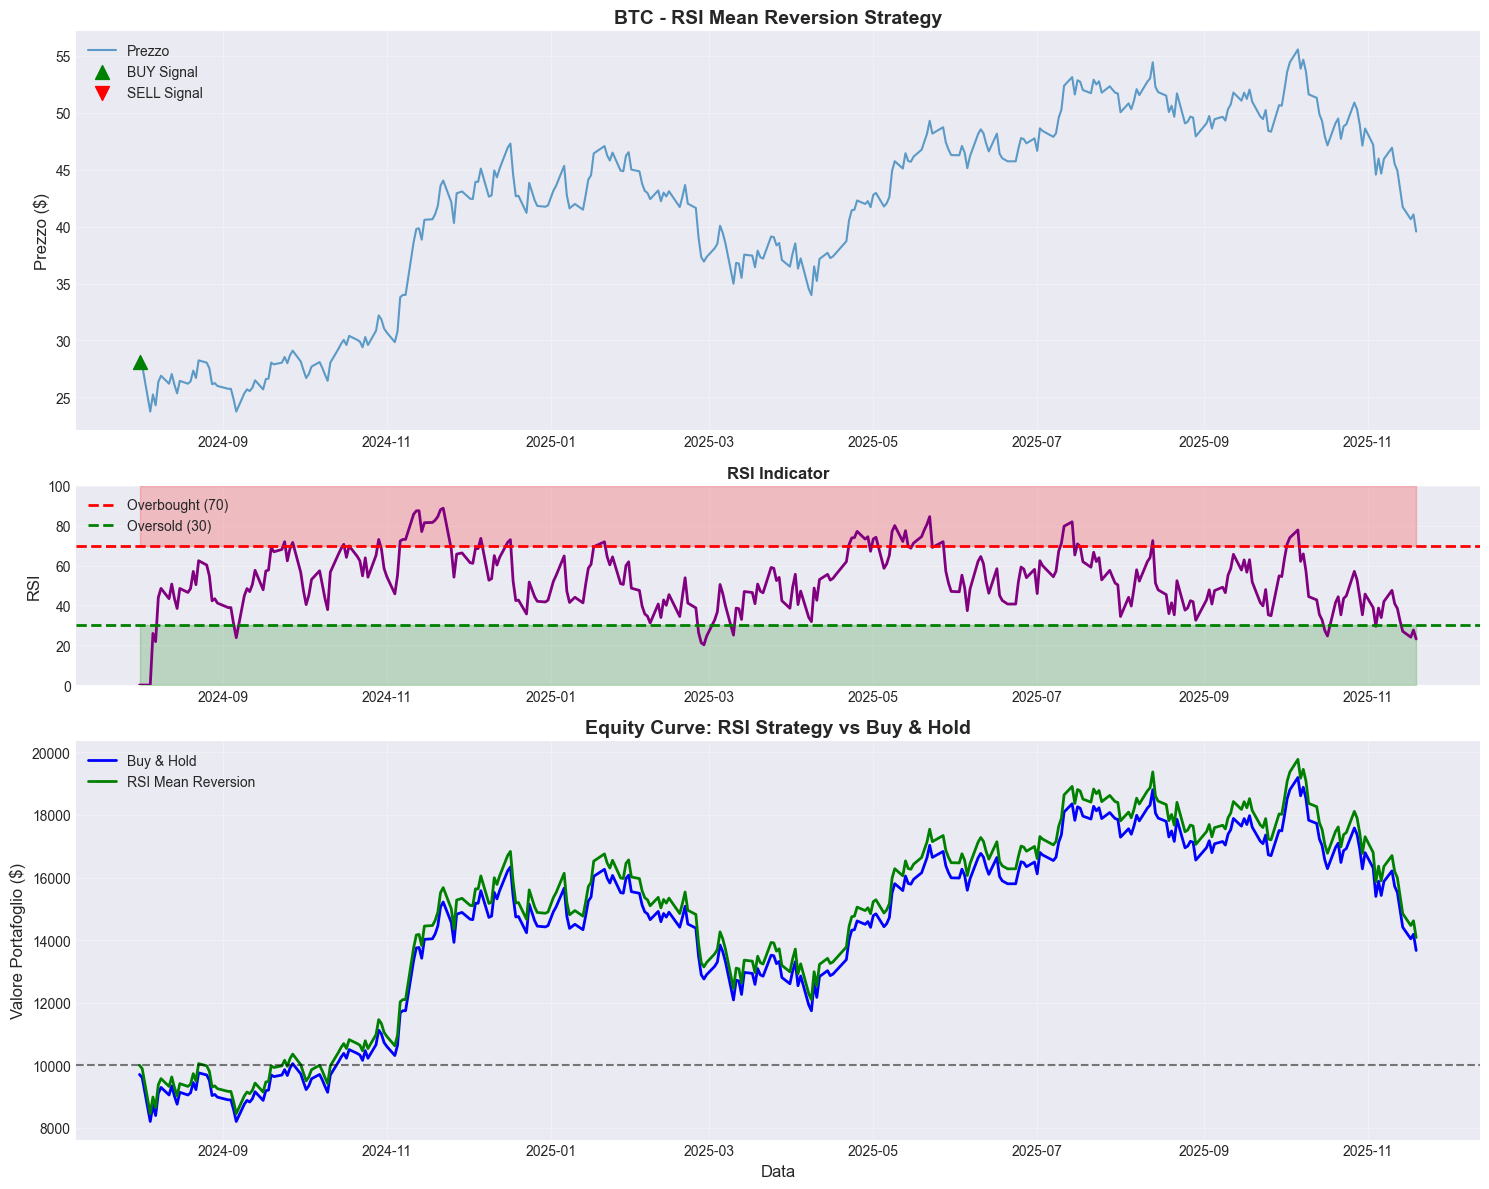

In [ ]:
# Grafico completo RSI strategy
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12), 
                                    gridspec_kw={'height_ratios': [2, 1, 2]})

# Grafico 1: Prezzo con segnali BUY/SELL
ax1.plot(results_rsi.index, results_rsi['Close'], label='Prezzo', linewidth=1.5, alpha=0.7)

buy_signals = results_rsi[results_rsi['Position'] == 1]
sell_signals = results_rsi[results_rsi['Position'] == -1]

ax1.scatter(buy_signals.index, buy_signals['Close'], 
           marker='^', color='green', s=100, label='BUY Signal', zorder=5)
ax1.scatter(sell_signals.index, sell_signals['Close'], 
           marker='v', color='red', s=100, label='SELL Signal', zorder=5)

ax1.set_title(f'{ticker_detail} - RSI Mean Reversion Strategy', fontsize=14, fontweight='bold')
ax1.set_ylabel('Prezzo ($)', fontsize=12)
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Grafico 2: RSI con zone overbought/oversold
ax2.plot(results_rsi.index, results_rsi['RSI'], color='purple', linewidth=2)
ax2.axhline(y=70, color='red', linestyle='--', linewidth=2, label='Overbought (70)')
ax2.axhline(y=30, color='green', linestyle='--', linewidth=2, label='Oversold (30)')
ax2.fill_between(results_rsi.index, 70, 100, alpha=0.2, color='red')
ax2.fill_between(results_rsi.index, 0, 30, alpha=0.2, color='green')

ax2.set_title('RSI Indicator', fontsize=12, fontweight='bold')
ax2.set_ylabel('RSI', fontsize=12)
ax2.set_ylim(0, 100)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# Grafico 3: Equity Curve comparison
ax3.plot(results_rsi.index, results_rsi['Buy_Hold_Equity'], 
        label='Buy & Hold', linewidth=2, color='blue')
ax3.plot(results_rsi.index, results_rsi['Strategy_Equity'], 
        label='RSI Mean Reversion', linewidth=2, color='green')

ax3.set_title('Equity Curve: RSI Strategy vs Buy & Hold', fontsize=14, fontweight='bold')
ax3.set_ylabel('Valore Portafoglio ($)', fontsize=12)
ax3.set_xlabel('Data', fontsize=12)
ax3.legend(loc='upper left')
ax3.grid(True, alpha=0.3)
ax3.axhline(y=10000, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
trades_rsi = analyze_rsi_trades(results_rsi, initial_capital=10000)


In [ ]:
trades_rsi

""


In [ ]:
# Analizza i trade RSI
trades_rsi = analyze_rsi_trades(results_rsi, initial_capital=10000)

print("\n📊 ANALISI TRADE-BY-TRADE RSI")
print("="*110)
print(trades_rsi.to_string(index=False))
print("="*110)

# Statistiche
print("\n📈 STATISTICHE RSI STRATEGY:")
print(f"Numero totale trade: {len(trades_rsi)}")
print(f"Trade vincenti: {len(trades_rsi[trades_rsi['Result'] == 'WIN'])}")
print(f"Trade perdenti: {len(trades_rsi[trades_rsi['Result'] == 'LOSS'])}")

winning_trades = trades_rsi[trades_rsi['Result'] == 'WIN']
losing_trades = trades_rsi[trades_rsi['Result'] == 'LOSS']

if len(trades_rsi) > 0:
    win_rate = (len(winning_trades) / len(trades_rsi)) * 100
    print(f"\nWin Rate: {win_rate:.2f}%")

if len(winning_trades) > 0:
    print(f"\nAverage Win: {winning_trades['PnL_%'].mean():.2f}%")
    print(f"Largest Win: {winning_trades['PnL_%'].max():.2f}%")

if len(losing_trades) > 0:
    print(f"\nAverage Loss: {losing_trades['PnL_%'].mean():.2f}%")
    print(f"Largest Loss: {losing_trades['PnL_%'].min():.2f}%")

if len(losing_trades) > 0 and len(winning_trades) > 0:
    risk_reward = abs(winning_trades['PnL_%'].mean() / losing_trades['PnL_%'].mean())
    print(f"\nRisk/Reward Ratio: {risk_reward:.2f}")

print(f"\nHolding period medio: {trades_rsi['Holding_Days'].mean():.1f} giorni")


📊 ANALISI TRADE-BY-TRADE RSI
Empty DataFrame
Columns: []
Index: []

📈 STATISTICHE RSI STRATEGY:
Numero totale trade: 0


KeyError: 'Result'

In [ ]:
# Confronto finale
print("\n" + "="*80)
print("⚔️  CONFRONTO: RSI MEAN REVERSION vs MA CROSSOVER")
print("="*80)

comparison = {
    'Metrica': ['Final Value', 'Total Return %', 'Numero Trade', 
                'Max Drawdown %', 'Sharpe Ratio (approx)'],
    'RSI Strategy': [
        f"${results_rsi['Strategy_Equity'].iloc[-1]:,.2f}",
        f"{((results_rsi['Strategy_Equity'].iloc[-1] / 10000 - 1) * 100):.2f}%",
        len(trades_rsi),
        f"{((results_rsi['Strategy_Equity'].cummax() - results_rsi['Strategy_Equity']) / results_rsi['Strategy_Equity'].cummax()).max() * -100:.2f}%",
        f"{(results_rsi['Strategy_Returns'].mean() / results_rsi['Strategy_Returns'].std() * np.sqrt(252)):.2f}"
    ],
    'MA Crossover': [
        f"${results_ma['Strategy_Equity'].iloc[-1]:,.2f}",
        f"{((results_ma['Strategy_Equity'].iloc[-1] / 10000 - 1) * 100):.2f}%",
        "TBD",  # Devi calcolarlo tu
        f"{((results_ma['Strategy_Equity'].cummax() - results_ma['Strategy_Equity']) / results_ma['Strategy_Equity'].cummax()).max() * -100:.2f}%",
        f"{(results_ma['Strategy_Returns'].mean() / results_ma['Strategy_Returns'].std() * np.sqrt(252)):.2f}"
    ]
}

comparison_df = pd.DataFrame(comparison)
print(comparison_df.to_string(index=False))
print("="*80)


⚔️  CONFRONTO: RSI MEAN REVERSION vs MA CROSSOVER
              Metrica RSI Strategy MA Crossover
          Final Value  $424,452.36  $101,848.73
       Total Return %     4144.52%      918.49%
         Numero Trade            0          TBD
       Max Drawdown %      -43.80%      -29.09%
Sharpe Ratio (approx)         0.98         0.83
